In [1]:
import os
import pandas as pd

In [2]:
import papermill as pm

In [3]:
from sklearn_evaluation import NotebookCollection

## Set Up

In [4]:
output_directory = "outputs"
os.makedirs(output_directory, exist_ok=True)

In [5]:
experiments = [
    {
        "model_name": "GaussianNB"
    },
    {
        "model_name": "LogisticRegression"
    },
    {
        "model_name": "KNN"
    },
    {
        "model_name": "DecisionTree"
    },
    {
        "model_name": "RandomForest"
    }
]

## Run Experiments

In [6]:
# execute notebooks using papermill
for model in experiments:

    pm.execute_notebook(
        "classifier.template.ipynb",
        output_path=os.path.join(output_directory, model["model_name"] + ".ipynb"),
        parameters=model
    )

In [7]:
nbs = NotebookCollection(
    paths=[os.path.join(output_directory, model["model_name"] + ".ipynb") for model in experiments],
    ids=[model["model_name"] for model in experiments]
)

In [8]:
nbs

In [9]:
list(nbs)

['confusion', 'accuracy', 'roc']

## Compare

### Confusion Matrix

In [10]:
nbs["confusion"]

### Accuracy

In [11]:
nbs["accuracy"]

In [12]:
pd.DataFrame(
    {
        "name": nbs["accuracy"],
        "accuracy": [nbs["accuracy"][model] for model in nbs["accuracy"]]
    }
).sort_values(by="accuracy", ascending=False)

,name,accuracy
1,LogisticRegression,0.798701
4,RandomForest,0.798701
2,KNN,0.785714
0,GaussianNB,0.772727
3,DecisionTree,0.701299


### ROC Curve

In [13]:
nbs["roc"]

In [14]:
import IPython.display as display
from PIL import Image

GaussianNB


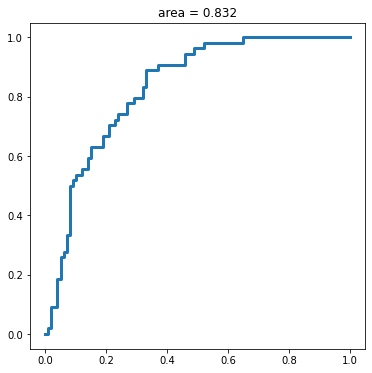

LogisticRegression


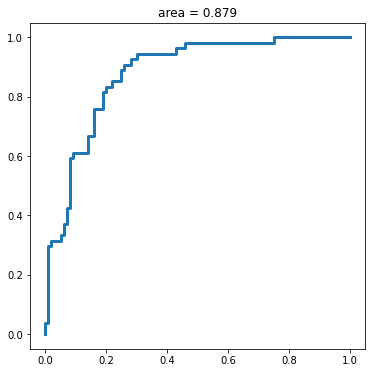

KNN


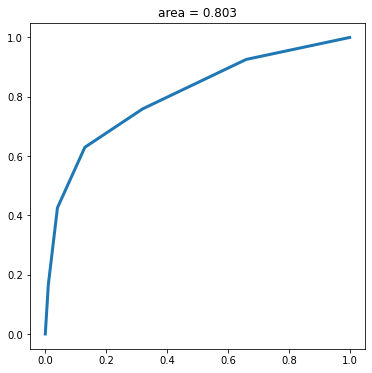

DecisionTree


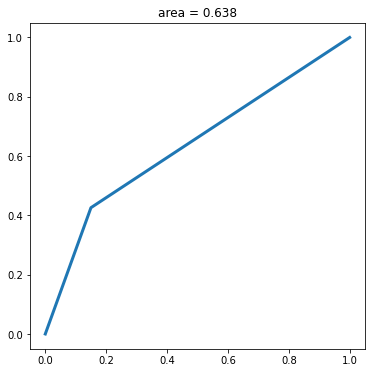

RandomForest


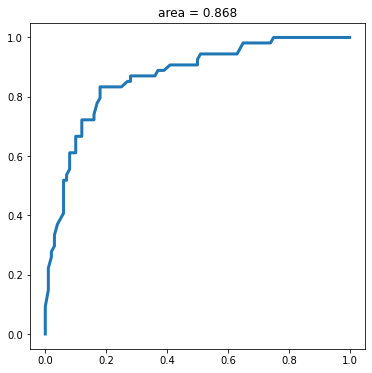

In [15]:
for model in nbs["roc"]:
    print(model)
    display.display(nbs["roc"][model])